# 1. Business Understanding:
As the importance of digitization is increasing, countries and companies has to stay ahead of the competition 
to provide higher quality living/services, therefore digitization have become more of a strategy. 
Hence, countries and companies alike are increasing involvement in digitization projects and initiatives, in order 
to spearhead effective deployment and adoption.
Henceforth, and essentially for that purpose, I have looked into the Stack Overflow 2017 survey to get insights 
into the industry.
looking at the survey, the following questions surfaced, and in this notebook I deep dive into the data to answer
them:
    1. What is the most popular development type in the industry?

    2. What are mostly used Frameworks, Platforms and IDEs?

    3. Since Freelancers have higher rates of job satisfaction (based on the data), What is the distribution of freelancers in terms of: Gender, Country, Development type, Development Methodology, and what are their views on education?

    4. What are the chances that a developer would contribute to open source?

    5. Based on our data how can we predict rates of job satisfaction?


In [643]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline


df = pd.read_csv('survey_results_public.csv')
schema = pd.read_csv('survey_results_schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [605]:
# define a dictionary for the font to be used in out plots
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

# 2. Data Understanding:
Before starting the analysis, I'll check the following:
- shape of our dataframe.
- columns to exclude.
- information from our schema dataframe on the columns we are interested to explore in our analysis.

In [606]:
df.shape # we have 19102 row and 154 columns

(19102, 154)

In [607]:
set(df.columns) #list of columns in our dataframe

{'AnnoyingUI',
 'AssessJobCommute',
 'AssessJobCompensation',
 'AssessJobDept',
 'AssessJobDiversity',
 'AssessJobExp',
 'AssessJobFinances',
 'AssessJobIndustry',
 'AssessJobLeaders',
 'AssessJobOffice',
 'AssessJobProduct',
 'AssessJobProfDevel',
 'AssessJobProjects',
 'AssessJobRemote',
 'AssessJobRole',
 'AssessJobTech',
 'AuditoryEnvironment',
 'BoringDetails',
 'BuildingThings',
 'CareerSatisfaction',
 'ChallengeMyself',
 'ChangeWorld',
 'CheckInCode',
 'ClickyKeys',
 'CollaborateRemote',
 'CompanySize',
 'CompanyType',
 'CompetePeers',
 'Country',
 'CousinEducation',
 'Currency',
 'DeveloperType',
 'DifficultCommunication',
 'DiversityImportant',
 'EducationImportant',
 'EducationTypes',
 'EmploymentStatus',
 'EnjoyDebugging',
 'EquipmentSatisfiedCPU',
 'EquipmentSatisfiedMonitors',
 'EquipmentSatisfiedRAM',
 'EquipmentSatisfiedRW',
 'EquipmentSatisfiedStorage',
 'ExCoder10Years',
 'ExCoderActive',
 'ExCoderBalance',
 'ExCoderBelonged',
 'ExCoderNotForMe',
 'ExCoderReturn',
 'Ex

In [608]:
schema[schema['Column'] == 'DeveloperType'] #description on DeveloperType column retrieved from schema 

,Column,Question
14,DeveloperType,Which of the following best describe you?


In [609]:
list(schema[schema['Column'] == 'WebDeveloperType']['Question'])[0] 

'Which of the following best describes you as a Web developer?'

In [610]:
list(schema[schema['Column'] == 'HaveWorkedFramework']['Question'])[0]

'Which of the following libraries, frameworks, and tools have you done extensive development work in over the past year, and which do you want to work in over the next year?'

In [611]:
list(schema[schema['Column'] == 'HaveWorkedPlatform']['Question'])[0]

'Which of the following platforms have you done extensive development work for over the past year, and which do you want to work on over the next year?'

In [612]:
list(schema[schema['Column'] == 'IDE']['Question'])[0]

'Which development environment(s) do you use regularly?'

In [613]:
list(schema[schema['Column'] == 'EmploymentStatus']['Question'])[0] #description on EmploymentStatus column retrieved from schema 

'Which of the following best describes your current employment status?'

In [614]:
list(schema[schema['Column'] == 'JobSatisfaction']['Question'])[0]

'Job satisfaction rating'

In [615]:
list(schema[schema['Column'] == 'Methodology']['Question'])[0]

'Which of the following methodologies do you have experience working in?'

In [616]:
list(schema[schema['Column'] == 'EducationImportant']['Question'])[0] #description on EducationImportant column retrieved from schema 

'Overall, how important has your formal schooling and education been to your career success?'

In [617]:
list(schema[schema['Column'] == 'SelfTaughtTypes']['Question'])[0]

"You indicated that you had taught yourself a programming technology without taking a course. What resources did you use to do that? If you've done it more than once, please think about the most recent time you've done so."

In [618]:
list(schema[schema['Column'] == 'ProgramHobby']['Question'])[0]

'Do you program as a hobby or contribute to open source projects?'

# 3. Prepare and Analyse the data:
    - Now we start exploring our data further to answer our questions

## 1. What is the most popular development type in the industry?

In [623]:
Dev_type = df['DeveloperType'].value_counts().reset_index()
Dev_type.head()

,index,DeveloperType
0,Web developer,4283
1,Web developer; Desktop applications developer,775
2,Web developer; Mobile developer,573
3,Desktop applications developer,561
4,Mobile developer,559


#### we found that one person could be practicing more that one type of developement, following we will count each value:

In [624]:
Dev_type.rename(columns={'index':'DevelopementType', 'DeveloperType': 'Count'}, inplace = True)
Dev_type.head()

,DevelopementType,Count
0,Web developer,4283
1,Web developer; Desktop applications developer,775
2,Web developer; Mobile developer,573
3,Desktop applications developer,561
4,Mobile developer,559


In [625]:
#possible values in the DeveloperType column
Developer_type=["Mobile developer", "Web developer", "Graphics programming", "Desktop applications developer", 
                "Embedded applications/devices developer", "Other", 
                "Developer with a statistics or mathematics background", "Database administrator", 
                "Systems administrator", "DevOps specialist", "Graphic designer", "Data scientist",
                "Machine learning specialist", "Quality assurance engineer"]

In [626]:
#here we define a generic function to count every possible value, incase a column allows more than one value.
#this function will be used across this notebook

def col_count(df,col1,col2,values):

    from collections import defaultdict

    new_df = defaultdict(int)

    for val in values:
            for idx in range(df.shape[0]):
                if val in df[col1][idx]:
                    new_df[val]+= int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns=[col1,col2]
    new_df.sort_values('Count', ascending=False,inplace= True)
    return new_df

In [627]:

Dev_type_df = col_count(Dev_type,'DevelopementType','Count',Developer_type)
Dev_type_df 

,DevelopementType,Count
1,Web developer,10086
3,Desktop applications developer,3869
0,Mobile developer,2905
7,Database administrator,1827
9,DevOps specialist,1505
6,Developer with a statistics or mathematics bac...,1479
8,Systems administrator,1479
4,Embedded applications/devices developer,1174
11,Data scientist,1077
5,Other,996


In [650]:
10086/sum(Dev_type_df ['Count'])

0.35593040900589334

Text(0.5, 1.0, 'Most popular type of development')

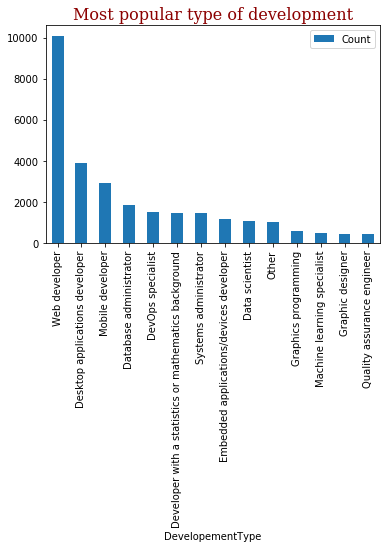

In [484]:
Dev_type_df.set_index('DevelopementType', inplace=True)
Dev_type_df.plot(kind="bar")
plt.title("Most popular type of development", fontdict=font)

#### since web development seams to be leading the industry, we further explore our dataset to get insignt into the mostly practiced type of web development:

Text(0.5, 1.0, 'Most practiced type of web development')

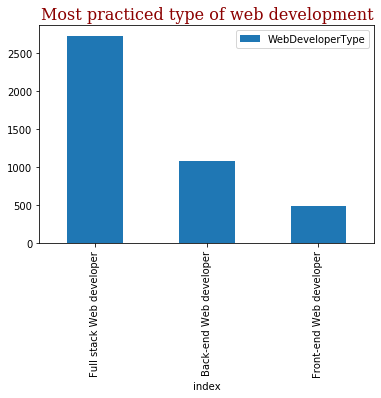

In [635]:
web_type = df['WebDeveloperType'].value_counts().sort_values(ascending=False).reset_index()
web_type.set_index('index', inplace=True)
web_type.plot(kind="bar")
plt.title("Most practiced type of web development", fontdict=font)

### Based on the above, we can see that:
    1. Web development is dramatically the most popular type of development, out of 19102 respondents 10086 are web developers.
    2. Most web developers are Full stack developers.

## 2. What are mostly used Frameworks, Platforms and IDEs?

#### a. Framework:

In [503]:
frameworks_count = df['HaveWorkedFramework'].value_counts().reset_index()
frameworks_count.head()

,index,HaveWorkedFramework
0,.NET Core,1089
1,AngularJS,864
2,Node.js,762
3,AngularJS; Node.js,653
4,Node.js; React,384


In [504]:
frameworks_count.rename(columns={'index':'HaveWorkedFramework', 'HaveWorkedFramework': 'Count'}, inplace = True)
frameworks_count.head()

,HaveWorkedFramework,Count
0,.NET Core,1089
1,AngularJS,864
2,Node.js,762
3,AngularJS; Node.js,653
4,Node.js; React,384


In [496]:
Frameworks = [".NET Core", "React", "AngularJS", "Hadoop", "Spark", "Node.js", "Cordova", "Xamarin", "Firebase"]

In [505]:
Frameworks_worked = col_count(frameworks_count,'HaveWorkedFramework','Count',Frameworks)
Frameworks_worked.head()

,HaveWorkedFramework,Count
5,Node.js,3394
2,AngularJS,3217
0,.NET Core,2354
1,React,1552
6,Cordova,742


Text(0.5, 1.0, 'Most used Framework')

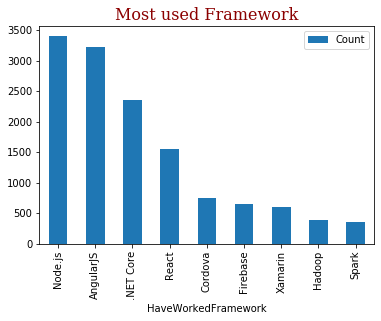

In [506]:
Frameworks_worked.set_index('HaveWorkedFramework', inplace=True)
Frameworks_worked.plot(kind="bar")
plt.title("Most used Framework", fontdict=font)

#### b. Platform:

In [507]:
platform_count = df['HaveWorkedPlatform'].value_counts().reset_index()
platform_count.head()

,index,HaveWorkedPlatform
0,Windows Desktop,1243
1,Amazon Web Services (AWS),714
2,Linux Desktop,605
3,Android,418
4,Windows Desktop; Linux Desktop,417


In [510]:
platform_count.rename(columns={'index':'HaveWorkedPlatform', 'HaveWorkedPlatform': 'Count'}, inplace = True)
platform_count.head()

,HaveWorkedPlatform,Count
0,Windows Desktop,1243
1,Amazon Web Services (AWS),714
2,Linux Desktop,605
3,Android,418
4,Windows Desktop; Linux Desktop,417


In [511]:
Platforms = ["iOS", "Amazon Web Services (AWS)", "Windows Desktop", "Linux Desktop", "Android", 
             "Mac OS", "Windows Phone", "Raspberry Pi", "WordPress", "Arduino", "Microsoft Azure", 
             "Serverless", "SharePoint", "Salesforce", "Mainframe"]

In [512]:
Platforms_worked = col_count(platform_count,'HaveWorkedPlatform','Count',Platforms)
Platforms_worked.head()

,HaveWorkedPlatform,Count
2,Windows Desktop,4195
3,Linux Desktop,3345
1,Amazon Web Services (AWS),3046
4,Android,2650
5,Mac OS,1973


Text(0.5, 1.0, 'Most used Platform')

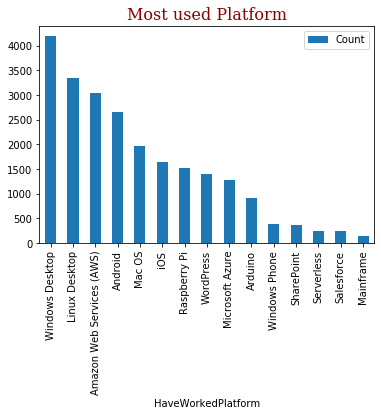

In [514]:
Platforms_worked.set_index('HaveWorkedPlatform', inplace=True)
Platforms_worked.plot(kind="bar")
plt.title("Most used Platform", fontdict=font)

#### c. IDE:

In [515]:
IDE_count = df['IDE'].value_counts().reset_index()
IDE_count.head()

,index,IDE
0,Notepad++; Visual Studio,610
1,Visual Studio,578
2,Vim,501
3,Notepad++; Visual Studio; Visual Studio Code,391
4,Visual Studio; Visual Studio Code,380


In [516]:
IDE_count.rename(columns={'index':'IDE', 'IDE': 'Count'}, inplace = True)
IDE_count.head()

,IDE,Count
0,Notepad++; Visual Studio,610
1,Visual Studio,578
2,Vim,501
3,Notepad++; Visual Studio; Visual Studio Code,391
4,Visual Studio; Visual Studio Code,380


In [517]:
IDEs = ["Atom", "Sublime Text", "Notepad++", "Emacs", "Vim", "Coda", "Visual Studio", "PHPStorm", 
        "IntelliJ", "NetBeans", "Visual Studio Code", "Android Studio", "Eclipse", "IPython / Jupyter", 
        "Xcode", "RubyMine", "TextMate", "PyCharm", "RStudio", "Komodo", "Light Table", "Zend"]

In [521]:
IDE_used = col_count(IDE_count,'IDE','Count',IDEs)
IDE_used.head()

,IDE,Count
6,Visual Studio,5923
2,Notepad++,4405
4,Vim,3739
1,Sublime Text,3505
8,IntelliJ,2786


Text(0.5, 1.0, 'Most used IDE')

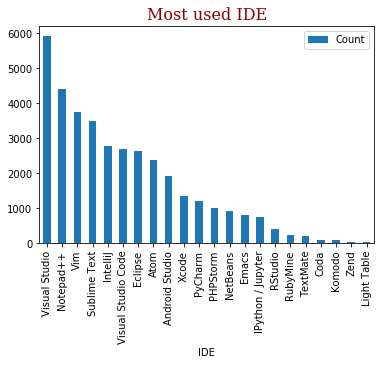

In [522]:
IDE_used.set_index('IDE', inplace=True)
IDE_used.plot(kind="bar")
plt.title("Most used IDE", fontdict=font)

### Looking at the plots we have generated we find that: 
    1. The three frameworks that are used by most developers are: 
        - Node.js
        - AngularJs
        - .NET Core
    2. The three platforms that are used by most developers are:
        - Windows Desktop
        - Linux Desktop
        - Amazon Services (AWS)
    3. The three IDEs that are used by most developers are:
        - Visual Studio
        - Notepad++
        - Vim

## 3. Since Freelancers have higher rates of job satisfaction (based on the data), What is the distribution of freelancers in terms of: Gender, Country, Development type, Development Methodology, and what are their views on education?

#### Checking job satisfaction by employment status:

In [642]:
df.groupby(['EmploymentStatus']).mean()['JobSatisfaction'].sort_values().reset_index()

,EmploymentStatus,JobSatisfaction
0,Employed part-time,6.846154
1,Employed full-time,6.980608
2,"Independent contractor, freelancer, or self-em...",7.231985
3,I prefer not to say,NaN
4,"Not employed, and not looking for work",NaN
5,"Not employed, but looking for work",NaN
6,Retired,NaN


In [437]:
pd.DataFrame(df.query("Gender == 'Male' or Gender == 'Female'").groupby(['Gender', 'EmploymentStatus']).mean()['JobSatisfaction'])

JobSatisfaction
Gender EmploymentStatus                                                   
Female Employed full-time                                         7.023677
       Employed part-time                                         7.529412
       I prefer not to say                                             NaN
       Independent contractor, freelancer, or self-emp...         7.093023
       Not employed, and not looking for work                          NaN
       Not employed, but looking for work                              NaN
       Retired                                                         NaN
Male   Employed full-time                                         7.050245
       Employed part-time                                         6.811628
       I prefer not to say                                             NaN
       Independent contractor, freelancer, or self-emp...         7.262580
       Not employed, and not looking for work                          NaN
       Not employed, but looking for work                              NaN
       Retired                                                         NaN

#### Since Freelancer Job Satisfaction rates are higher for males than females, we conclude that most freelancers are males. Next we'll test this idea:

In [524]:
df['EmploymentStatus'].value_counts() #we check how many freelancers in our dataset

Employed full-time                                      13655
Independent contractor, freelancer, or self-employed     1866
Employed part-time                                       1168
Not employed, and not looking for work                   1066
Not employed, but looking for work                        906
I prefer not to say                                       381
Retired                                                    60
Name: EmploymentStatus, dtype: int64

In [525]:
#we define a new dataset of freelancers only to explore
Freelancer = df[df['EmploymentStatus'] == 'Independent contractor, freelancer, or self-employed']
Freelancer.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
9,10,Professional developer,"Yes, I program as a hobby",France,"Yes, full-time","Independent contractor, freelancer, or self-em...",Master's degree,Computer science or software engineering,It's complicated,NaN,...,Disagree,Male,A doctoral degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,NaN,NaN
15,16,Professional developer,"Yes, I program as a hobby",United States,"Yes, part-time","Independent contractor, freelancer, or self-em...",Primary/elementary school,NaN,All or almost all the time (I'm full-time remote),NaN,...,Disagree,Male,A doctoral degree,White or of European descent,Disagree,Somewhat agree,Strongly disagree,Agree,NaN,NaN
23,24,Professional developer,"Yes, both",Italy,No,"Independent contractor, freelancer, or self-em...",Secondary school,NaN,All or almost all the time (I'm full-time remote),NaN,...,Disagree,Male,High school,White or of European descent,Agree,Agree,Disagree,Agree,NaN,NaN
32,33,None of these,"Yes, I contribute to open source projects",Germany,"Yes, full-time","Independent contractor, freelancer, or self-em...",Professional degree,Computer science or software engineering,NaN,NaN,...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Somewhat agree,Strongly disagree,Agree,NaN,NaN
33,34,Professional developer,"Yes, I program as a hobby",Brazil,"Yes, full-time","Independent contractor, freelancer, or self-em...",Some college/university study without earning ...,Computer science or software engineering,All or almost all the time (I'm full-time remote),NaN,...,Strongly disagree,Male,"Some college/university study, no bachelor's d...",White or of European descent,Strongly agree,Agree,Strongly disagree,Strongly agree,NaN,NaN


Text(0.5, 1.0, 'Distribution of freelancers by gender')

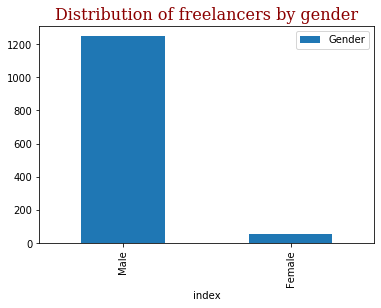

In [527]:
Gender = Freelancer['Gender'].value_counts().sort_values(ascending = False).reset_index()
Gender.set_index('index', inplace=True)
Gender[:2].plot(kind="bar")
plt.title("Distribution of freelancers by gender", fontdict=font)

In [647]:
1248/sum(Gender['Gender'])

0.9425981873111783

#### The above plot confirms our idea that most freelancers are Male

Text(0.5, 1.0, 'Distribution of freelancers by country')

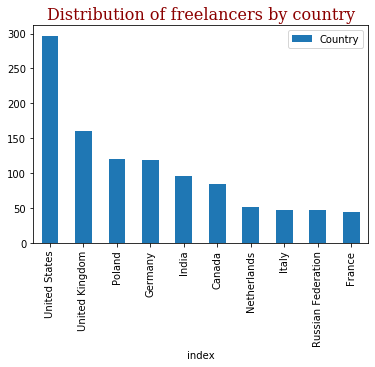

In [529]:
Country = Freelancer['Country'].value_counts().sort_values(ascending = False).reset_index()
Country.set_index('index', inplace=True)
Country[:10].plot(kind="bar")
plt.title("Distribution of freelancers by country", fontdict=font)

In [649]:
297/sum(Country['Country'])

0.15916398713826366

#### The above plot shows that most freelancers are from the United states

In [92]:
free_dev = Freelancer['DeveloperType'].value_counts().reset_index()
free_dev.head()

,index,DeveloperType
0,Web developer,373
1,Web developer; Mobile developer,66
2,Web developer; Desktop applications developer,49
3,Mobile developer,39
4,Desktop applications developer,35


In [93]:
free_dev.rename(columns={'index':'DevelopementType', 'DeveloperType': 'Count'}, inplace = True)
free_dev.head()

,DevelopementType,Count
0,Web developer,373
1,Web developer; Mobile developer,66
2,Web developer; Desktop applications developer,49
3,Mobile developer,39
4,Desktop applications developer,35


Text(0.5, 1.0, 'Distribution of freelancers by type of Development')

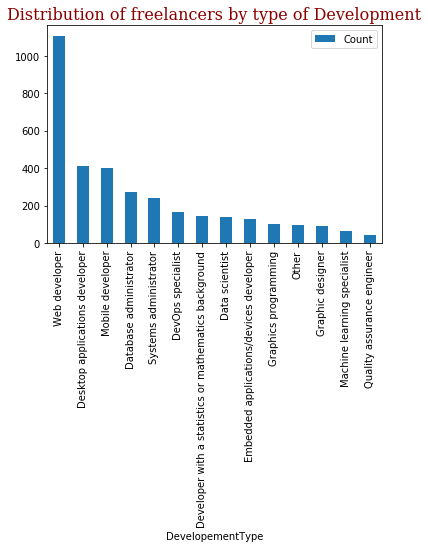

In [531]:
free_dev_count = col_count(free_dev,'DevelopementType','Count',Developer_type)
free_dev_count.set_index('DevelopementType', inplace=True)
free_dev_count.plot(kind="bar")
plt.title("Distribution of freelancers by type of Development", fontdict=font)

Text(0.5, 1.0, 'Most practiced type of web development by freelancers')

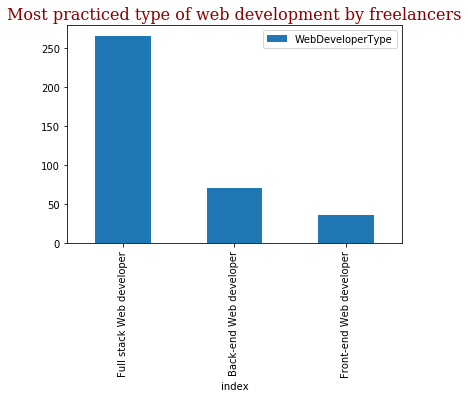

In [532]:
web_type_free = Freelancer['WebDeveloperType'].value_counts().sort_values(ascending=False).reset_index()
web_type_free.set_index('index', inplace=True)
web_type_free.plot(kind="bar")
plt.title("Most practiced type of web development by freelancers", fontdict=font)

#### The above plots show that most freelancers are full stack web developers

In [540]:
Free_Meth = Freelancer['Methodology'].value_counts().reset_index()
Free_Meth.rename(columns={'index':'Methodology', 'Methodology': 'Count'}, inplace = True)
Free_Meth.head()

,Methodology,Count
0,Agile; Scrum,71
1,Agile,66
2,Agile; Scrum; Kanban,36
3,Agile; Scrum; Pair,30
4,Agile; Scrum; Pair; Kanban,28


In [541]:
Method = ["Agile", "Waterfall", "Scrum", "Kanban", "Extreme", "Evidence-based SWE", 
          "Mob", "Lean", "Domain-driven design", "PRINCE2", "Pair"]

Text(0.5, 1.0, 'Development methodology frequently used by freelancers')

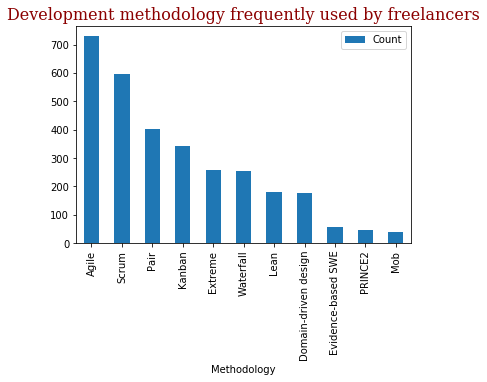

In [543]:
Free_Meth_count = col_count(Free_Meth,'Methodology','Count',Method)
Free_Meth_count.set_index('Methodology', inplace=True)
Free_Meth_count.plot(kind='bar')
plt.title("Development methodology frequently used by freelancers", fontdict=font)

#### From the plot above we can see that most freelancers prefer Agile and Scrum methodologies over others.

Text(0.5, 1.0, 'Freelancers view on the importance of education')

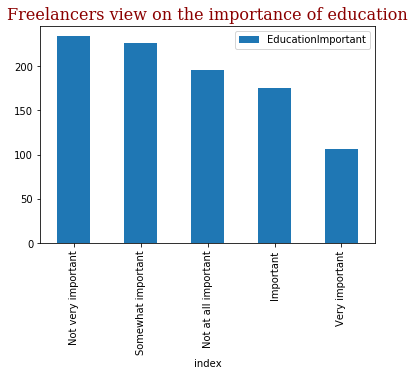

In [534]:
ed = Freelancer['EducationImportant'].value_counts().sort_values(ascending=False).reset_index()
ed.set_index('index', inplace=True)
ed.plot(kind="bar")
plt.title("Freelancers view on the importance of education", fontdict=font)

#### Most freelancers believe that education is not very important, therefore we'll explore methods of self learning used by freelancers:

In [535]:
self_taught = Freelancer['SelfTaughtTypes'].value_counts().reset_index()
self_taught.head()

,index,SelfTaughtTypes
0,Official documentation; Trade book; Stack Over...,47
1,Official documentation; Trade book; Stack Over...,43
2,Official documentation; Stack Overflow Q&A,37
3,Official documentation; Stack Overflow Q&A; Bu...,37
4,Official documentation; Trade book; Stack Over...,37


In [536]:
self_taught.rename(columns={'index':'SelfTaughtTypes', 'SelfTaughtTypes': 'Count'}, inplace = True)
self_taught.head()


,SelfTaughtTypes,Count
0,Official documentation; Trade book; Stack Over...,47
1,Official documentation; Trade book; Stack Over...,43
2,Official documentation; Stack Overflow Q&A,37
3,Official documentation; Stack Overflow Q&A; Bu...,37
4,Official documentation; Trade book; Stack Over...,37


In [537]:
self_taught_vals = ["Official documentation", "Stack Overflow Q&A", "Company internal community", 
                    "Other", "Tutoring/mentoring", "Friends network", "Trade book", "Built-in help", 
                    "Textbook", "Non-Stack online communities", "Stack Overflow Docs"]

Text(0.5, 1.0, 'Methods of self learning used by Freelancers')

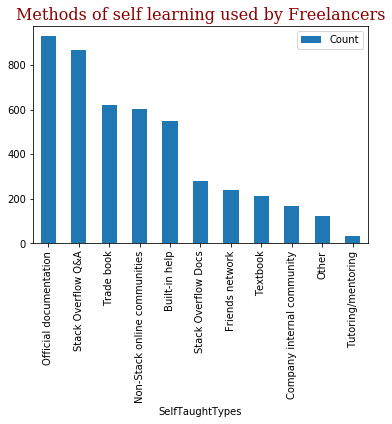

In [539]:
self_taught_count = col_count(self_taught,'SelfTaughtTypes','Count',self_taught_vals)
self_taught_count.set_index('SelfTaughtTypes', inplace=True)
self_taught_count.plot(kind="bar")
plt.title("Methods of self learning used by Freelancers", fontdict=font)

#### From our plots above we deduce that most freelancers view education as not very important and prefer learning from:
- Official documentation 
- Stack Overflow Q&A

# 4. Model the data:
    - Following we create models to answer are remaining questions:

## 4. What are the chances that a developer would contribute to open source?

### To answer this question, we will build a model that will predict if a developer would contribute to Opensource:

In [546]:
df['ProgramHobby'].value_counts()

Yes, I program as a hobby                    9260
Yes, both                                    5033
No                                           3661
Yes, I contribute to open source projects    1148
Name: ProgramHobby, dtype: int64

In [547]:
#write a function to mark those developers who contribute to opensource:
def Open_Source_check(exp):

    if exp in ("Yes, I contribute to open source projects"):
        return 1
    else:
        return 0
    

In [552]:
df['OpenSource'] = df['ProgramHobby'].apply(Open_Source_check) #add a column to our dataframe that'll mark developer contributing to opensource

In [553]:
df['OpenSource'].value_counts()

0    17954
1     1148
Name: OpenSource, dtype: int64

In [554]:
sum(df['OpenSource'].isnull()) #check if by chance there are nulls in oue column of interest

0

In [555]:
df.shape

(19102, 155)

In [556]:
#create a dataframe to base our model on and drop columns that will hinder our learning
Model_df = df.drop(['Respondent', 'ExpectedSalary','ProgramHobby'],axis=1)
Model_df.shape

(19102, 152)

In [557]:
Model_df.dropna(how='all', axis=1) #drop column having all values null

,Professional,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,OpenSource
0,Student,United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,0
1,Student,United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,"Privately-held limited company, not in startup...",9 to 10 years,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,0
2,Professional developer,United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",Publicly-traded corporation,20 or more years,...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,0
3,Professional non-developer who sometimes write...,United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",Non-profit/non-governmental organization or pr...,14 to 15 years,...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,0
4,Professional developer,Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,"Privately-held limited company, not in startup...",20 or more years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19097,Professional developer,Canada,No,Employed full-time,Bachelor's degree,A business discipline,A few days each month,10 to 19 employees,"Privately-held limited company, not in startup...",1 to 2 years,...,Disagree,Male,"Some college/university study, no bachelor's d...",White or of European descent,Somewhat agree,Agree,Disagree,Agree,NaN,0
19098,Student,India,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,1 to 2 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
19099,Professional non-developer who sometimes write...,United Kingdom,No,"Independent contractor, freelancer, or self-em...",Bachelor's degree,Computer science or software engineering,Never,NaN,NaN,14 to 15 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
19100,Professional developer,United States,No,Employed full-time,Some college/university study without earning ...,A humanities discipline,"Less than half the time, but at least one day ...",100 to 499 employees,"Sole proprietorship or partnership, not in sta...",20 or more years,...,Disagree,Male,"Some college/university study, no bachelor's d...",White or of European descent,Somewhat agree,Somewhat agree,Disagree,Agree,110000.0,0


In [560]:
y = Model_df['OpenSource'] #set our response column (we have previously confirmed the columns has 0 null values)
y.shape

(19102,)

In [561]:
x = Model_df.drop(['OpenSource'],axis = 1) #define our x matrix
x.shape

(19102, 151)

In [375]:
#impute null values in our x matrix for numeric values by filling them with the mean
for col in x.select_dtypes(include=['float', 'int']).columns:
        x[col].fillna((x[col].mean()), inplace=True)

In [376]:
#getting dummies of categorical variables in our x matrix
for var in  x.select_dtypes(include=['object']).copy().columns:
        x = pd.concat([x.drop(var, axis=1), pd.get_dummies(x[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)

In [377]:
x.shape

(19102, 23192)

In [378]:
#split our dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=42)
#instantiate the model
lm_model = LinearRegression(normalize=True) 
#fit the model
lm_model.fit(x_train, y_train)
#Predict on test data 
y_test_preds = lm_model.predict(x_test) 
#score model using evaluation metric 
r2score = r2_score(y_test,y_test_preds)
r2score

-1.54615917410065e+28

#### with r2-score value of ~ -1.55 our model failed to predict if a developer would contribute to opensource, therefore we will try giving it another try by reducing the x-matrix

In [396]:
#after trying different thresholds to reduce x with each one failing, we'll try 5000
reduce_x = x.iloc[:, np.where((x.sum() > 5000) == True)[0]]

In [397]:
reduce_x.shape

(19102, 41)

In [398]:
#split our dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(reduce_x, y, test_size=.30, random_state=42)
#instantiate the model
lm_model = LinearRegression(normalize=True) 
#fit the model
lm_model.fit(x_train, y_train)
#Predict on test data 
y_test_preds = lm_model.predict(x_test) 
#score model using evaluation metric 
r2score = r2_score(y_test,y_test_preds)
r2score

0.004784981636334562

#### After trying to reduce x, we got an improved r2-score of 0.004, but our model still failed to predict if a developer would contribute to open-source. Which means that we cannot come up with the desired conclusion working with the provided dataset

## 5. Based on our data how can we predict rates of job satisfaction?

In [562]:
#create a dataframe to base our model on and drop columns that will hinder our learning
new_df = df.drop(['OpenSource','Respondent'], axis = 1)

In [563]:
new_df.describe()

,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,16102.000000,15253.000000,7721.000000,13452.000000,5009.000000,818.000000
mean,7.343932,7.000721,3.685922,8.357865,58341.398571,32231.521687
std,1.919330,2.128648,7.330691,1.405546,40753.384986,28543.877274
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,6.000000,0.000000,8.000000,27956.989247,4716.459735
50%,8.000000,7.000000,1.000000,8.000000,51612.903226,29784.946237
75%,9.000000,8.000000,3.000000,9.000000,83333.333333,50000.000000
max,10.000000,10.000000,40.000000,10.000000,195000.000000,120000.000000


In [312]:
new_df = new_df.dropna(how='all', axis=1) #drop column having all values null

In [313]:
new_df.shape

(19102, 153)

In [564]:
#Drop null values from our response vector
new_df = new_df.dropna(subset = ['JobSatisfaction'], axis = 0)
new_df.shape

(15253, 153)

In [565]:
n_y = new_df['JobSatisfaction'] #define our response vector

In [566]:
# define our x-matrix
n_x = new_df.drop(['JobSatisfaction','ExpectedSalary'],axis = 1)
n_x.shape

(15253, 151)

In [339]:
n_x.dropna(how='all', axis=1)
n_x.shape

(15253, 151)

In [340]:
#impute null values in our x matrix for numeric values by filling them with the mean
for col in n_x.select_dtypes(include=['float', 'int']).columns:
        n_x[col].fillna((n_x[col].mean()), inplace=True)

In [341]:
#getting dummies of categorical variables in our x matrix
for var in  n_x.select_dtypes(include=['object']).copy().columns:
        n_x = pd.concat([n_x.drop(var, axis=1), pd.get_dummies(n_x[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)

In [342]:
n_x.shape

(15253, 20605)

In [343]:
#split our dataset into train and test
n_x_train, n_x_test, n_y_train, n_y_test = train_test_split(n_x, n_y, test_size=.30, random_state=42)
#instantiate the model
n_lm_model = LinearRegression(normalize=True) 
#fit the model
n_lm_model.fit(n_x_train, n_y_train)
#Predict on test data 
n_y_test_preds = n_lm_model.predict(n_x_test) 
#score model using evaluation metric 
n_r2score = r2_score(n_y_test,n_y_test_preds)
n_r2score

-7.282114595847812e+27

#### with r2-score value of ~ -7.28 our model failed to predict job satisfaction, therefore we will try giving it another try by reducing the x-matrix

In [363]:
reduce_n_x = n_x.iloc[:, np.where((n_x.sum() > 100) == True)[0]]

In [364]:
#split our dataset into train and test
n_x_train, n_x_test, n_y_train, n_y_test = train_test_split(reduce_n_x, n_y, test_size=.30, random_state=42)
#instantiate the model
n_lm_model = LinearRegression(normalize=True) 
#fit the model
n_lm_model.fit(n_x_train, n_y_train)
#Predict on test data 
n_y_test_preds = n_lm_model.predict(n_x_test) 
#score model using evaluation metric 
n_r2score = r2_score(n_y_test,n_y_test_preds)
n_r2score

0.47887883097628314

In [361]:
reduce_n_x.shape #50

(15253, 1100)

In [359]:
reduce_n_x.shape #100

(15253, 785)

#### After trying to reduce x with a threshold of 100, we got an improved r2-score of ~ 0.48, 